# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Hanif | Bhuian | Hanif Bhuian, October 18, 2024 | 5 | 25 |
| Member 2: | Tanvir | Tusher | Tanvir Hassan Tusher, October 18, 2024 | 5 |25 |
| Member 3: | Tanzina | Khan | Tanzina Khan, October 18, 2024 | 5 | 25 |
| Member 4: | Janvi | Desai | Janvi Desai, October 18,2024 | 5 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

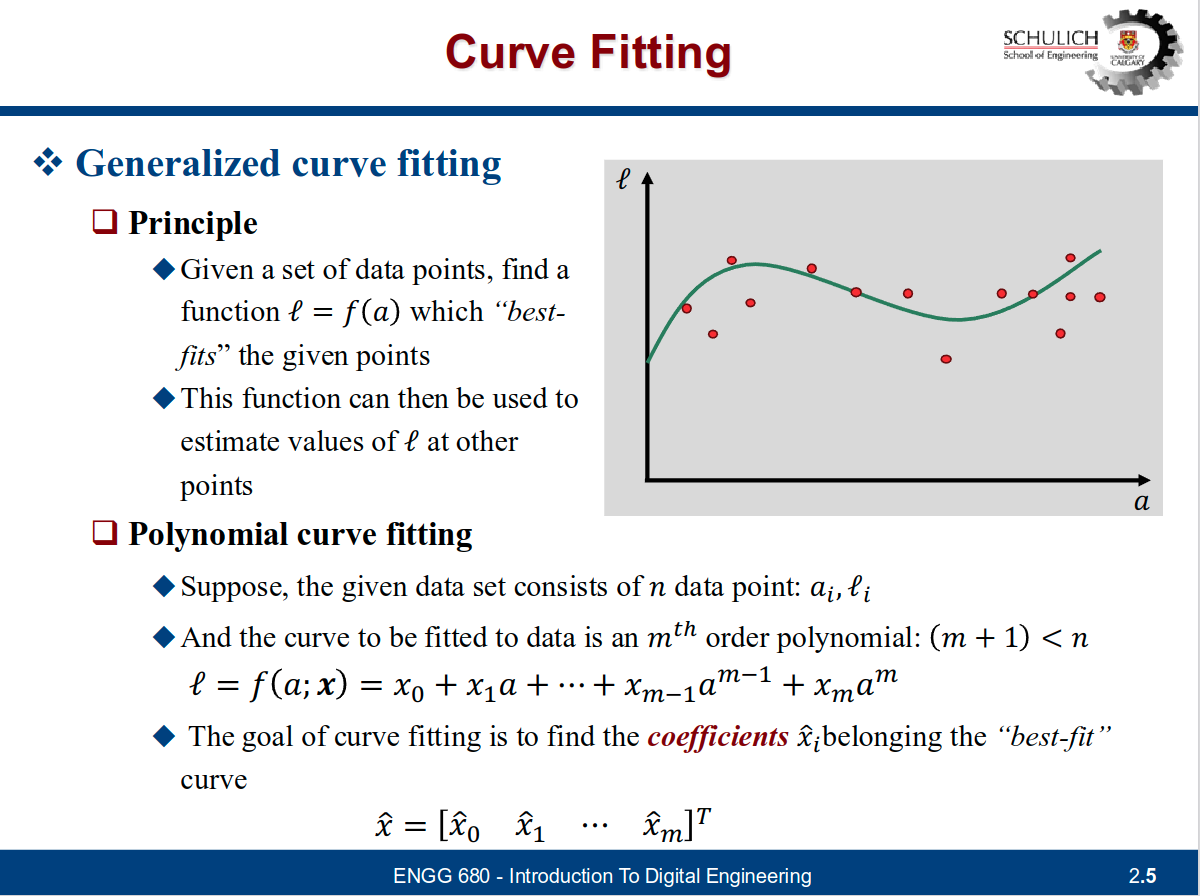

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ENGG 680 (Assignment)/Assignment 2/ENGG680_Fall24_Assignment2/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()  # Converts the entire DataFrame into a NumPy array

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]        # Noisy observations
l_var = arr_data[:, 1]     # Variance of observations
l_true = arr_data[:, 2]    # True observations

In [5]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

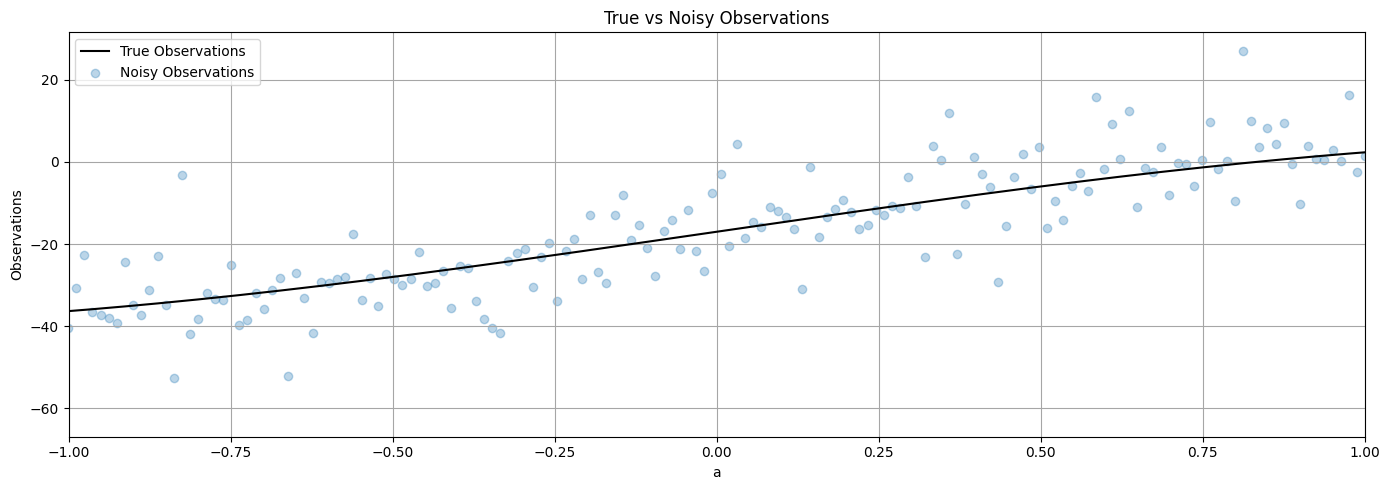

In [8]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations as a line plot
ax.plot(a, l_true, label='True Observations', color='k')  # True observation, color black ('k')

# Plot noisy observations as a scatter plot
ax.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)  # Noisy observation

# Set axis labels
ax.set_xlabel('a')
ax.set_ylabel('Observations')

# Set the x-axis range to -1 to 1
ax.set_xlim(-1, 1)

# Add a legend
ax.legend()

# Set the title
ax.set_title('True vs Noisy Observations')

# Enable grid lines
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()


In [9]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # (a) Construct the design matrix A (Vandermonde matrix) for the polynomial of degree 'deg'
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix

    # (b) Perform the weighted least squares estimation
    # Intermediate (a): A^T * P * A
    ATPA = A.T @ P @ A

    # Intermediate (b): A^T * P * l
    ATPl = A.T @ P @ l

    # Solve for the estimated coefficients (x) using the normal equations: x = (A^T * P * A)^(-1) * (A^T * P * l)
    x = np.linalg.inv(ATPA) @ ATPl  # Estimated polynomial coefficients

    # Calculate the observation residuals (v = A * x - l)
    v = A @ x - l

    # Calculate the a posteriori variance factor (apv) using the formula: apv = (v^T * P * v) / (n - m)
    # where n is the number of observations, and m is the number of estimated parameters (deg + 1)
    n = len(l)  # Number of observations
    m = deg + 1  # Number of parameters (polynomial degree + 1)
    apv = (v.T @ P @ v) / (n - m)  # A posteriori variance factor

    # Calculate the covariance matrix of the estimated coefficients (cov_x = apv * (A^T * P * A)^(-1))
    cov_x = apv * np.linalg.inv(ATPA)  # Covariance matrix of the estimated coefficients

    return (x, cov_x, apv, v)


In [10]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...
# Degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)

# Degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)

# Degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)


In [11]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x_deg1[::-1], a) #For degree 1 (linear polynomial)
cubic_uw = np.polyval(x_deg3[::-1], a) #For degree 3 (cubic polynomial)
quintic_uw = np.polyval(x_deg5[::-1], a) #For degree 5 (quintic polynomial)

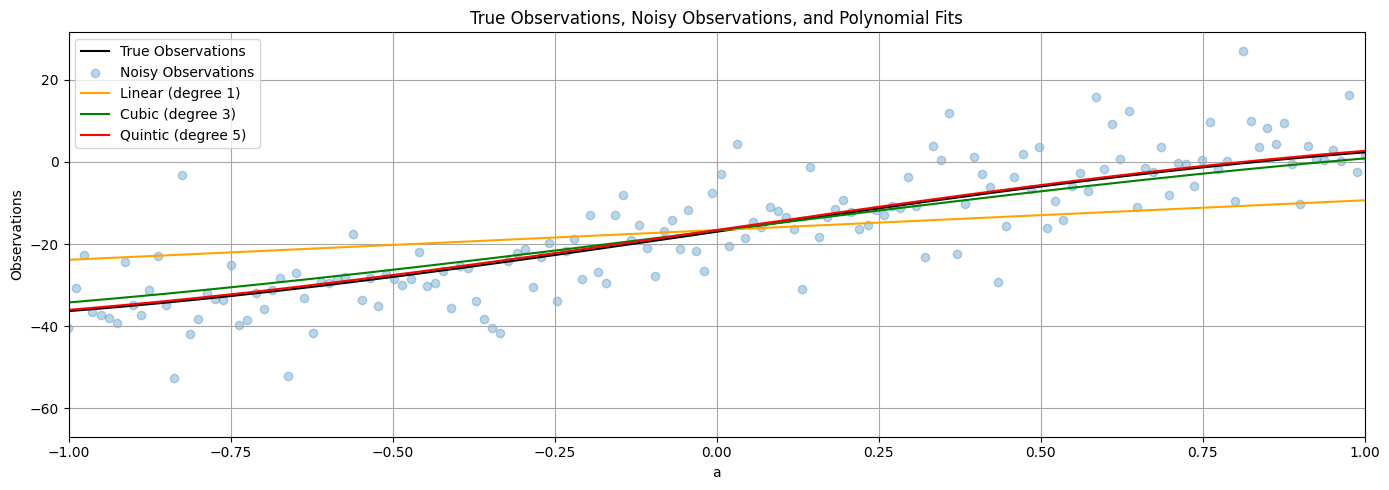

In [12]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations (black line)
ax.plot(a, l_true, label='True Observations', color='k')

# Plot noisy observations (scatter plot with transparency)
ax.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)

# Plot the polynomial functions
ax.plot(a, line_uw, label='Linear (degree 1)', color='orange')  # Linear polynomial in orange
ax.plot(a, cubic_uw, label='Cubic (degree 3)', color='green')  # Cubic polynomial in green
ax.plot(a, quintic_uw, label='Quintic (degree 5)', color='red')  # Quintic polynomial in red

# Set axis labels
ax.set_xlabel('a')
ax.set_ylabel('Observations')

# Set the x-axis range to -1 to 1
ax.set_xlim(-1, 1)

# Add a legend
ax.legend()

# Set the title
ax.set_title('True Observations, Noisy Observations, and Polynomial Fits')

# Enable grid lines
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()


In [13]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
# Fit the polynomial of degree 1 and get the APV
_, _, apv_deg_1, _ = fit_polynomial_curve(a, l, P, 1)
print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_deg_1}")

# Fit the polynomial of degree 3 and get the APV
_, _, apv_deg_3, _ = fit_polynomial_curve(a, l, P, 3)
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_deg_3}")

# Fit the polynomial of degree 5 and get the APV
_, _, apv_deg_5, _ = fit_polynomial_curve(a, l, P, 5)
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_deg_5}")

A Posteriori Variance Factor for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor for Degree 5 Polynomial: 63.758344630184176


In [14]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...

# Assuming 'l_true' contains the original true observations and has a length of 500
l_true_resampled = l_true

# Compute the norm for the degree 1 polynomial
norm_deg_1 = np.linalg.norm(line_uw - l_true_resampled)  # Norm of the difference
print(f"L2 Norm between Degree 1 Polynomial and True Observations: {norm_deg_1}")

# Compute the norm for the degree 3 polynomial
norm_deg_3 = np.linalg.norm(cubic_uw - l_true_resampled)  # Norm of the difference
print(f"L2 Norm between Degree 3 Polynomial and True Observations: {norm_deg_3}")

# Compute the norm for the degree 5 polynomial
norm_deg_5 = np.linalg.norm(quintic_uw - l_true_resampled)  # Norm of the difference
print(f"L2 Norm between Degree 5 Polynomial and True Observations: {norm_deg_5}")

L2 Norm between Degree 1 Polynomial and True Observations: 229.06016796744092
L2 Norm between Degree 3 Polynomial and True Observations: 38.285979929116635
L2 Norm between Degree 5 Polynomial and True Observations: 17.36996719696425


In [15]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
# Answer is given below:

**A Posteriori Variance Factor:** The values of the a posteriori variance factor decrease as the degree of the polynomial increases. For degree 1, the variance factor is 162.74, which reduces to 66.13 for degree 3 and further to 63.76 for degree 5. This pattern indicates that higher-degree polynomials fit the data better, as the variance factor.

**L2 Norm:** Similarly, the L2 norm between the polynomial and the true observations decreases with the degree of the polynomial. For degree 1, the L2 norm is 229.06, which drops significantly to 38.29 for degree 3, and further to 17.37 for degree 5. This suggests that the higher-degree polynomials approximate the true observations more accurately, resulting in a lower deviation.

In [16]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
l_var_resampled = l_var[:len(a)]  # Resample or slice l_var to match the size of 'a'

P = np.diag(1 / l_var_resampled) #define the P matrix

In [17]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

# the proper P matrix
degrees = [1, 3, 5]

for deg in degrees:
    print(f"\nFitting polynomial of degree {deg} with weighted observations:")

    # S6: Call the function to fit the polynomial and fetch the results using the weighted P matrix
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    # S7: Use the estimated coefficients to construct polynomial functions
    if deg == 1:
        line_uw = np.polyval(np.flip(x), a)
    elif deg == 3:
        cubic_uw = np.polyval(np.flip(x), a)
    elif deg == 5:
        quintic_uw = np.polyval(np.flip(x), a)

    # S9: Print the a posteriori variance factor for each polynomial function
    print(f"A Posteriori Variance Factor for Degree {deg} Polynomial: {apv}")

    # S10: Compute and print the norm between the predicted observations and the true observations
    if deg == 1:
        norm_deg_1 = np.linalg.norm(line_uw - l_true_resampled)
        print(f"L2 Norm between Degree 1 Polynomial and True Observations: {norm_deg_1}")
    elif deg == 3:
        norm_deg_3 = np.linalg.norm(cubic_uw - l_true_resampled)
        print(f"L2 Norm between Degree 3 Polynomial and True Observations: {norm_deg_3}")
    elif deg == 5:
        norm_deg_5 = np.linalg.norm(quintic_uw - l_true_resampled)
        print(f"L2 Norm between Degree 5 Polynomial and True Observations: {norm_deg_5}")


Fitting polynomial of degree 1 with weighted observations:
A Posteriori Variance Factor for Degree 1 Polynomial: 12.054651233436907
L2 Norm between Degree 1 Polynomial and True Observations: 230.67760813832942

Fitting polynomial of degree 3 with weighted observations:
A Posteriori Variance Factor for Degree 3 Polynomial: 1.1444647026537131
L2 Norm between Degree 3 Polynomial and True Observations: 36.07026687266801

Fitting polynomial of degree 5 with weighted observations:
A Posteriori Variance Factor for Degree 5 Polynomial: 0.944700904385655
L2 Norm between Degree 5 Polynomial and True Observations: 5.741606915885327


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
#Answer is given below:

**A Posteriori Variance Factor:**



*   Unweighted: Higher variance across all degrees (e.g., 162.74 for degree 1).
*   Weighted: Much lower variance (e.g., 12.05, 1.14, and 0.94 for degree 1, 3, and 5 respectively), indicating a better fit.

**L2 Norm:**


*   Unweighted: Decreases with degree, but remains relatively high (e.g., 229.06, 38.28, and 17.37 for degree 1, 3, and 5 respectively).
*   Weighted: Significantly lower and decresing (e.g., 230.67, 36.07, and 5.74 for degree 1, 3, and 5 respectively), showing an improved fit.





# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

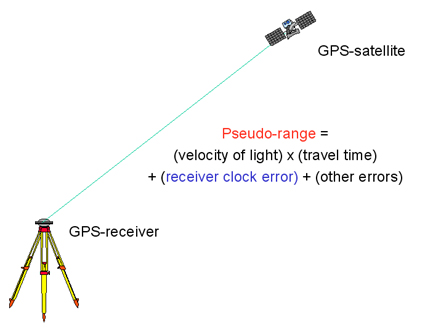

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ENGG680_Fall24_Assignment2/Lab_Assignment2/pseudoranges.xlsx')#...
df_sat_pos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ENGG680_Fall24_Assignment2/Lab_Assignment2/satellite_position.xlsx') #...

pseudorange = df_pseudorange.iloc[:, 1].to_numpy()  # Use the second column containing pseudorange values
sat_pos = df_sat_pos.iloc[:, 1:4].to_numpy()  # Extract the x, y, z columns

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.size
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
W = np.eye(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    diff = satellite_pos - receiver_pos
    distance = np.linalg.norm(diff, axis=1)
    return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    A = np.zeros((n, m))
    for j in range(n):
        d_x = (r_pos[0] - s_pos[j, 0]) / rho[j]
        d_y = (r_pos[1] - s_pos[j, 1]) / rho[j]
        d_z = (r_pos[2] - s_pos[j, 2]) / rho[j]
        A[j, :] = [d_x, d_y, d_z, 1]
    return A


In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
convergence_threshold = 0.001

while np.linalg.norm(delta[:3]) > convergence_threshold:
    # Compute the geometric distance between Satellites and receiver
    # (1 marks)
    rho = euclidean_norm(x_hat[:3], sat_pos)

    # Compute the design matrix A
    # (1 marks)
    A = design_matrix(x_hat[:3], sat_pos, rho)

    # Compute the misclosure array w
    # (1 marks)
    w = pseudorange - (rho + x_hat[3])

    # Compute the corrections delta using least squares estimation
    # (1 marks)
    delta = np.linalg.inv(A.T @ W @ A) @ (A.T @ W @ w)

    # Update the states
    # (1 marks)
    x_hat += delta

    # Compute the position error from using the updated states against groundtruth
    # (1 marks)
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Update the counter
    # (1 marks)
    i += 1

    # Store the misclosure, delta, position error, and counter from each iteration into arrays
    # (1 marks)
    arr_w.append(np.log(np.abs(w)))
    arr_delta.append(np.log(np.abs(delta[:3])))
    arr_err_pos.append(np.log(err_pos))
    arr_i.append(i)


# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
v = w
apv = (v.T @ W @ v) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ W @ A)




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print(f"Estimated States (x_hat): {x_hat}")
print(f"Corrections Array (delta): {delta}")
print(f"Estimated Measurements Residuals (w): {w}")
print(f"A Posteriori Variance of Unit Weight: {apv}")
print(f"Covariance Matrix of Estimated States (C_x_hat): {C_x_hat}")
print(f"Number of Iterations: {i}")
print(f"3D Position Errors: {err_pos}")


Estimated States (x_hat): [-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.47201389e+00]
Corrections Array (delta): [ 3.23113755e-06  6.39397325e-06 -1.75963170e-05 -2.09206393e-05]
Estimated Measurements Residuals (w): [ 0.25995968  0.11116656 -1.09951518 -0.00500947  0.2003028  -1.41816897
 -0.09127866  1.51207884  0.26364719  0.61137232 -0.34467609]
A Posteriori Variance of Unit Weight: 0.8852888535930045
Covariance Matrix of Estimated States (C_x_hat): [[ 0.31965006  0.06966245 -0.08457202 -0.07306881]
 [ 0.06966245  0.42546873 -0.58107148 -0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159  1.10402067]
 [-0.07306881 -0.3682586   1.10402067  0.69925737]]
Number of Iterations: 5
3D Position Errors: 5.431614722159558


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
#Answer is given below:



*   The posteriori variance of unit weight is 0.885, close to the ideal value of 1, indicating a good fit between the model and the data. The residuals are slightly smaller than expected, suggesting the model may be slightly conservative, but overall, the fit is reliable.
*  The covariance matrix shows the uncertainties in the estimated states, with variances like 0.320 for the first state and 2.046 for the third, indicating higher uncertainty for the third state. Strong negative correlations, such as -0.581 between the second and third states, highlight interdependencies among the states.



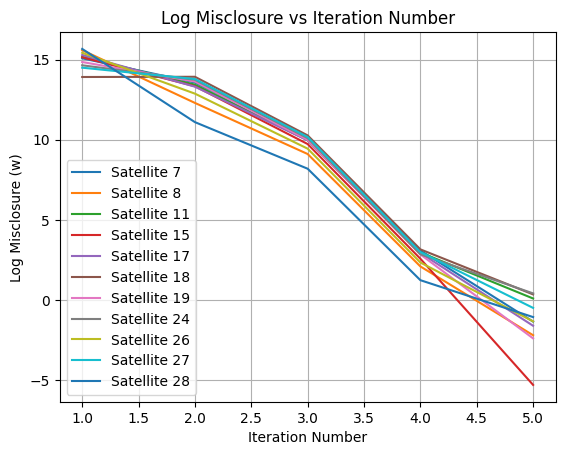

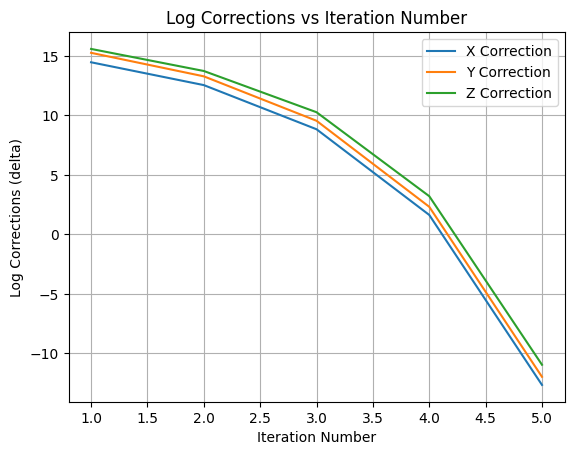

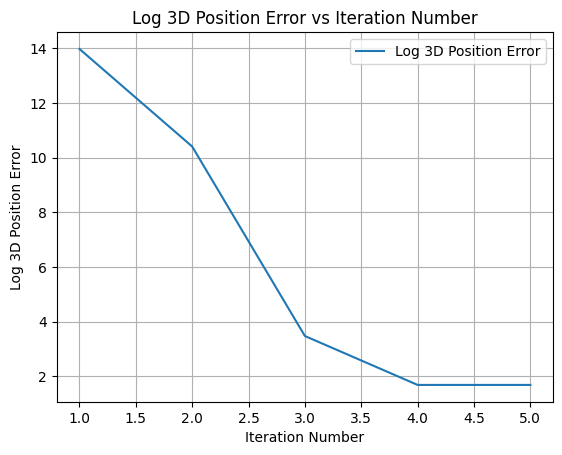

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()

# Access satellite IDs from the df_pseudorange DataFrame
satellite_ids = df_pseudorange['Satellite_ID'].values

# Plot each misclosure with a separate label for each satellite
for idx in range(len(arr_w[0])):
    plt.plot(arr_i, [w[idx] for w in arr_w], label=f'Satellite {satellite_ids[idx]}')

plt.xlabel('Iteration Number')
plt.ylabel('Log Misclosure (w)')
plt.title('Log Misclosure vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
labels = ['X Correction', 'Y Correction', 'Z Correction']

# Plot each correction (x, y, z) with a separate label
for idx in range(3):  # Assuming arr_delta has 3 columns (x, y, z corrections)
    plt.plot(arr_i, [delta[idx] for delta in arr_delta], label=labels[idx])

plt.xlabel('Iteration Number')
plt.ylabel('Log Corrections (delta)')
plt.title('Log Corrections vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, arr_err_pos, label='Log 3D Position Error')
plt.xlabel('Iteration Number')
plt.ylabel('Log 3D Position Error')
plt.title('Log 3D Position Error vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
#Answer is given below:



1.   Log Misclosure vs Iteration Number:
**Pattern:** The misclosure values (the difference between observed and computed pseudoranges) decrease steadily across iterations, converging towards zero. Each satellite's misclosure shows a similar downward trend, with some satellites converging faster than others.

**Explanation:** This indicates that the Least Squares Estimation (LSE) algorithm is working properly, as the fit between the estimated receiver position and the measured pseudoranges improves with each iteration. The convergence of all satellite measurements demonstrates that the model is refining its estimates effectively.
2. Log Corrections vs Iteration Number:

**Pattern:** The corrections for the receiver's position (x, y, z) also decrease consistently with each iteration, indicating that the position estimate is becoming more accurate. The corrections for x, y, and z follow a similar trajectory, with only slight differences in their rates of change.

**Explanation:** This shows that the receiver's estimated position is stabilizing over time as the corrections to the initial guess reduce. The similarity in behavior between x, y, and z corrections suggests a balanced refinement across all three spatial dimensions.
3. Log 3D Position Error vs Iteration Number:

**Pattern:**The 3D position error decreases sharply in the first few iterations and then flattens out, approaching a minimal value.

**Explanation:** This sharp reduction in error demonstrates that the LSE algorithm quickly improves the receiver's position estimate in the early iterations, with diminishing returns as the estimate approaches the ground truth. The flat section of the curve indicates that further iterations yield little additional improvement, meaning the solution has converged.





In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
